In [379]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
import time
import copy
import threading
import time
import collections

# Implementation of Dynamic Programming

In [380]:
class GridEnvironment(gym.Env):
    metadata = { 'render.modes': [] }
    
    def __init__(self):
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 10
        
    def reset(self):
        self.timestep = 0
        self.agent_pos = [0, 0]
        self.goal_pos = [3, 3]
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        observation = self.state.flatten()
        return observation
    
    def step(self, action):
        STOCASTIC = True
        # self.state = np.random.choice(self.observation_space.n)
        if action == 0:   #(Down)
            self.agent_pos[0] += 1
            self.agent_pos = np.clip(self.agent_pos, 0, 3)
            if(STOCASTIC == True):
                if(self.agent_pos == [1,1]).all():
                    if(np.random.uniform(0,1) < 0.05):
                        self.agent_pos[0] -= 1
        if action == 1:  #(Up)
            self.agent_pos[0] -= 1
            self.agent_pos = np.clip(self.agent_pos, 0, 3)
            if(STOCASTIC == True):  
                if(self.agent_pos == [1,1]).all(): 
                    if(np.random.uniform(0,1) < 0.05):
                        self.agent_pos[0] -= 1
            
        if action == 2:  #Right
            self.agent_pos[1] += 1
            self.agent_pos = np.clip(self.agent_pos, 0, 3)
            if(STOCASTIC == True): 
                if(self.agent_pos == [1,1]).all():
                    if(np.random.uniform(0,1) < 0.05):
                        self.agent_pos[1] -= 1
        
        if action == 3:  #Left
            self.agent_pos[1] -= 1
            self.agent_pos = np.clip(self.agent_pos, 0, 3)
            if(STOCASTIC == True):  
                if(self.agent_pos == [1,1]).all():
                    if(np.random.uniform(0,1) < 0.05):
                        self.agent_pos[1] += 1
        self.agent_pos = np.clip(self.agent_pos, 0, 1)
#         observation = reset(self)
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        observation = self.state.flatten()
#         reward = 0
#         if (self.agent_pos == self.goal_pos).all():
#           reward = 1
        M_X = 4  #Maximum index in x
        M_Y = 4  #Maximum index in y
        nA = 4   #Total actions
        nS = 16  # Total States
        P = {}  #Transition Probability
#         print(grid)
        it = np.nditer(grid, flags=['multi_index'])
        while not it.finished:
            s = it.iterindex
            y, x = it.multi_index
#             print(s,x,y)
            P[s] = {a : [] for a in range(nA)}   # P[s][a] = (prob, next_state, reward, is_done)
            is_done = lambda s: s == 0 or s == (nS - 1)
            reward = 0 if is_done(s) else 6 if s == 6 else -4 if s == 12 else -1
            #when reward is zero at terminal state it will return True else it will return false. 
            if is_done(s): #when is_done will be true that means the agent is at terminal state.
                P[s][0] = [(1.0, s, reward, True)]
                P[s][1] = [(1.0, s, reward, True)]
                P[s][2] = [(1.0, s, reward, True)]
                P[s][3] = [(1.0, s, reward, True)]
    
            else:                           #Not a terminal state. 
                if y == 0:
                    ns_up = s
                    if(STOCASTIC == True):
                        if(np.random.uniform(0,1) < 0.05):
                            ns_up = s + M_X        
                else : 
                    ns_up = s - M_X
                ns_right = s if x == (M_X - 1) else s + 1
                ns_down = s if y == (M_Y - 1) else s + M_X
                ns_left = s if x == 0 else s - 1
                P[s][0] = [(1.0, ns_down, reward, is_done(ns_down))]
                P[s][1] = [(1.0, ns_up, reward, is_done(ns_up))]
                P[s][2] = [(1.0, ns_right, reward, is_done(ns_right))]
                P[s][3] = [(1.0, ns_left, reward, is_done(ns_left))]

            it.iternext()
        isd = np.ones(nS) / nS
        self.P = P       
        self.timestep += 1
        done = True if self.timestep >= self.max_timesteps else False
        info = {}
        return P, observation, reward, done, info
        
    def render(self):
        plt.imshow(self.state)
        

Rendering The Environment

obs =  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]


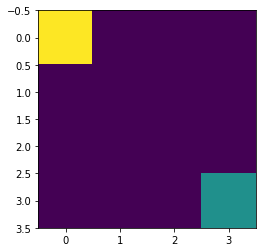

In [366]:
#Action Commands 
# 0 - down
# 1 - up
# 2 - right
# 3 - left
env = GridEnvironment()
obs = env.reset()
print("obs = ", obs)
env.render()

Random Agent

In [368]:
class RandomAgent:
    def __init__(self, env):
        self.env = env
        self.observation_space = env.observation_space
        self.action_space = env.action_space
        
    def step(self, observation):
        return np.random.choice(self.action_space.n)

 Setting up environment and agent You can Visualize the policy here. For every state other than terminal states, the states
  after the action has taken is visible. The states can be seen in the transition probability matrix printed below. 
  The Stochasticity in states can also be seen in that dictionery. After stochasticity the agent will move to some other
  states than defined. 
  It can be read as For 1st state, There are for actions, after each action the position of the agent is changed and is
  visible.
   P[s][0] = [(1.0, ns_down, reward, is_done(ns_down))] in this format.

[1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]
action 2
Reward: {0: {0: [(1.0, 0, 0, True)], 1: [(1.0, 0, 0, True)], 2: [(1.0, 0, 0, True)], 3: [(1.0, 0, 0, True)]}, 1: {0: [(1.0, 5, -1, False)], 1: [(1.0, 1, -1, False)], 2: [(1.0, 2, -1, False)], 3: [(1.0, 0, -1, True)]}, 2: {0: [(1.0, 6, -1, False)], 1: [(1.0, 2, -1, False)], 2: [(1.0, 3, -1, False)], 3: [(1.0, 1, -1, False)]}, 3: {0: [(1.0, 7, -1, False)], 1: [(1.0, 3, -1, False)], 2: [(1.0, 3, -1, False)], 3: [(1.0, 2, -1, False)]}, 4: {0: [(1.0, 8, -1, False)], 1: [(1.0, 0, -1, True)], 2: [(1.0, 5, -1, False)], 3: [(1.0, 4, -1, False)]}, 5: {0: [(1.0, 9, -1, False)], 1: [(1.0, 1, -1, False)], 2: [(1.0, 6, -1, False)], 3: [(1.0, 4, -1, False)]}, 6: {0: [(1.0, 10, 6, False)], 1: [(1.0, 2, 6, False)], 2: [(1.0, 7, 6, False)], 3: [(1.0, 5, 6, False)]}, 7: {0: [(1.0, 11, -1, False)], 1: [(1.0, 3, -1, False)], 2: [(1.0, 7, -1, False)], 3: [(1.0, 6, -1, False)]}, 8: {0: [(1.0, 12, -1, False)], 1: [(1.0, 4, -1, False)],

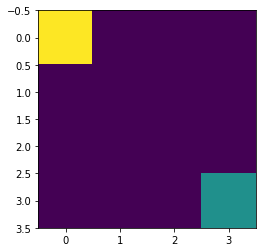

[0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]
action 3
Reward: {0: {0: [(1.0, 0, 0, True)], 1: [(1.0, 0, 0, True)], 2: [(1.0, 0, 0, True)], 3: [(1.0, 0, 0, True)]}, 1: {0: [(1.0, 5, -1, False)], 1: [(1.0, 1, -1, False)], 2: [(1.0, 2, -1, False)], 3: [(1.0, 0, -1, True)]}, 2: {0: [(1.0, 6, -1, False)], 1: [(1.0, 2, -1, False)], 2: [(1.0, 3, -1, False)], 3: [(1.0, 1, -1, False)]}, 3: {0: [(1.0, 7, -1, False)], 1: [(1.0, 7, -1, False)], 2: [(1.0, 3, -1, False)], 3: [(1.0, 2, -1, False)]}, 4: {0: [(1.0, 8, -1, False)], 1: [(1.0, 0, -1, True)], 2: [(1.0, 5, -1, False)], 3: [(1.0, 4, -1, False)]}, 5: {0: [(1.0, 9, -1, False)], 1: [(1.0, 1, -1, False)], 2: [(1.0, 6, -1, False)], 3: [(1.0, 4, -1, False)]}, 6: {0: [(1.0, 10, 6, False)], 1: [(1.0, 2, 6, False)], 2: [(1.0, 7, 6, False)], 3: [(1.0, 5, 6, False)]}, 7: {0: [(1.0, 11, -1, False)], 1: [(1.0, 3, -1, False)], 2: [(1.0, 7, -1, False)], 3: [(1.0, 6, -1, False)]}, 8: {0: [(1.0, 12, -1, False)], 1: [(1.0, 4, -1, False)],

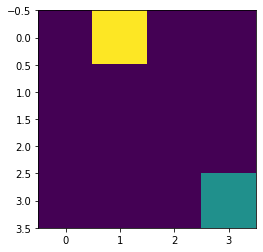

[1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]
action 1
Reward: {0: {0: [(1.0, 0, 0, True)], 1: [(1.0, 0, 0, True)], 2: [(1.0, 0, 0, True)], 3: [(1.0, 0, 0, True)]}, 1: {0: [(1.0, 5, -1, False)], 1: [(1.0, 1, -1, False)], 2: [(1.0, 2, -1, False)], 3: [(1.0, 0, -1, True)]}, 2: {0: [(1.0, 6, -1, False)], 1: [(1.0, 2, -1, False)], 2: [(1.0, 3, -1, False)], 3: [(1.0, 1, -1, False)]}, 3: {0: [(1.0, 7, -1, False)], 1: [(1.0, 7, -1, False)], 2: [(1.0, 3, -1, False)], 3: [(1.0, 2, -1, False)]}, 4: {0: [(1.0, 8, -1, False)], 1: [(1.0, 0, -1, True)], 2: [(1.0, 5, -1, False)], 3: [(1.0, 4, -1, False)]}, 5: {0: [(1.0, 9, -1, False)], 1: [(1.0, 1, -1, False)], 2: [(1.0, 6, -1, False)], 3: [(1.0, 4, -1, False)]}, 6: {0: [(1.0, 10, 6, False)], 1: [(1.0, 2, 6, False)], 2: [(1.0, 7, 6, False)], 3: [(1.0, 5, 6, False)]}, 7: {0: [(1.0, 11, -1, False)], 1: [(1.0, 3, -1, False)], 2: [(1.0, 7, -1, False)], 3: [(1.0, 6, -1, False)]}, 8: {0: [(1.0, 12, -1, False)], 1: [(1.0, 4, -1, False)],

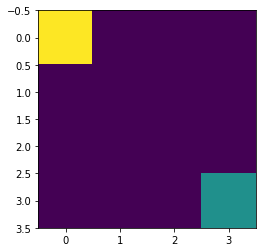

[1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]
action 1
Reward: {0: {0: [(1.0, 0, 0, True)], 1: [(1.0, 0, 0, True)], 2: [(1.0, 0, 0, True)], 3: [(1.0, 0, 0, True)]}, 1: {0: [(1.0, 5, -1, False)], 1: [(1.0, 1, -1, False)], 2: [(1.0, 2, -1, False)], 3: [(1.0, 0, -1, True)]}, 2: {0: [(1.0, 6, -1, False)], 1: [(1.0, 2, -1, False)], 2: [(1.0, 3, -1, False)], 3: [(1.0, 1, -1, False)]}, 3: {0: [(1.0, 7, -1, False)], 1: [(1.0, 3, -1, False)], 2: [(1.0, 3, -1, False)], 3: [(1.0, 2, -1, False)]}, 4: {0: [(1.0, 8, -1, False)], 1: [(1.0, 0, -1, True)], 2: [(1.0, 5, -1, False)], 3: [(1.0, 4, -1, False)]}, 5: {0: [(1.0, 9, -1, False)], 1: [(1.0, 1, -1, False)], 2: [(1.0, 6, -1, False)], 3: [(1.0, 4, -1, False)]}, 6: {0: [(1.0, 10, 6, False)], 1: [(1.0, 2, 6, False)], 2: [(1.0, 7, 6, False)], 3: [(1.0, 5, 6, False)]}, 7: {0: [(1.0, 11, -1, False)], 1: [(1.0, 3, -1, False)], 2: [(1.0, 7, -1, False)], 3: [(1.0, 6, -1, False)]}, 8: {0: [(1.0, 12, -1, False)], 1: [(1.0, 4, -1, False)],

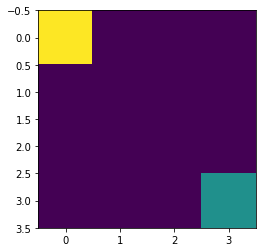

[1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]
action 3
Reward: {0: {0: [(1.0, 0, 0, True)], 1: [(1.0, 0, 0, True)], 2: [(1.0, 0, 0, True)], 3: [(1.0, 0, 0, True)]}, 1: {0: [(1.0, 5, -1, False)], 1: [(1.0, 1, -1, False)], 2: [(1.0, 2, -1, False)], 3: [(1.0, 0, -1, True)]}, 2: {0: [(1.0, 6, -1, False)], 1: [(1.0, 2, -1, False)], 2: [(1.0, 3, -1, False)], 3: [(1.0, 1, -1, False)]}, 3: {0: [(1.0, 7, -1, False)], 1: [(1.0, 3, -1, False)], 2: [(1.0, 3, -1, False)], 3: [(1.0, 2, -1, False)]}, 4: {0: [(1.0, 8, -1, False)], 1: [(1.0, 0, -1, True)], 2: [(1.0, 5, -1, False)], 3: [(1.0, 4, -1, False)]}, 5: {0: [(1.0, 9, -1, False)], 1: [(1.0, 1, -1, False)], 2: [(1.0, 6, -1, False)], 3: [(1.0, 4, -1, False)]}, 6: {0: [(1.0, 10, 6, False)], 1: [(1.0, 2, 6, False)], 2: [(1.0, 7, 6, False)], 3: [(1.0, 5, 6, False)]}, 7: {0: [(1.0, 11, -1, False)], 1: [(1.0, 3, -1, False)], 2: [(1.0, 7, -1, False)], 3: [(1.0, 6, -1, False)]}, 8: {0: [(1.0, 12, -1, False)], 1: [(1.0, 4, -1, False)],

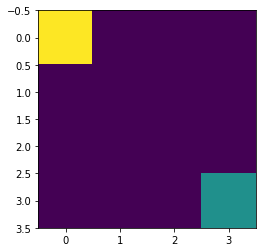

[1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]
action 3
Reward: {0: {0: [(1.0, 0, 0, True)], 1: [(1.0, 0, 0, True)], 2: [(1.0, 0, 0, True)], 3: [(1.0, 0, 0, True)]}, 1: {0: [(1.0, 5, -1, False)], 1: [(1.0, 1, -1, False)], 2: [(1.0, 2, -1, False)], 3: [(1.0, 0, -1, True)]}, 2: {0: [(1.0, 6, -1, False)], 1: [(1.0, 2, -1, False)], 2: [(1.0, 3, -1, False)], 3: [(1.0, 1, -1, False)]}, 3: {0: [(1.0, 7, -1, False)], 1: [(1.0, 3, -1, False)], 2: [(1.0, 3, -1, False)], 3: [(1.0, 2, -1, False)]}, 4: {0: [(1.0, 8, -1, False)], 1: [(1.0, 0, -1, True)], 2: [(1.0, 5, -1, False)], 3: [(1.0, 4, -1, False)]}, 5: {0: [(1.0, 9, -1, False)], 1: [(1.0, 1, -1, False)], 2: [(1.0, 6, -1, False)], 3: [(1.0, 4, -1, False)]}, 6: {0: [(1.0, 10, 6, False)], 1: [(1.0, 2, 6, False)], 2: [(1.0, 7, 6, False)], 3: [(1.0, 5, 6, False)]}, 7: {0: [(1.0, 11, -1, False)], 1: [(1.0, 3, -1, False)], 2: [(1.0, 7, -1, False)], 3: [(1.0, 6, -1, False)]}, 8: {0: [(1.0, 12, -1, False)], 1: [(1.0, 4, -1, False)],

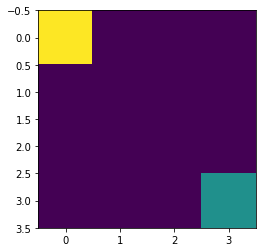

[1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]
action 1
Reward: {0: {0: [(1.0, 0, 0, True)], 1: [(1.0, 0, 0, True)], 2: [(1.0, 0, 0, True)], 3: [(1.0, 0, 0, True)]}, 1: {0: [(1.0, 5, -1, False)], 1: [(1.0, 1, -1, False)], 2: [(1.0, 2, -1, False)], 3: [(1.0, 0, -1, True)]}, 2: {0: [(1.0, 6, -1, False)], 1: [(1.0, 2, -1, False)], 2: [(1.0, 3, -1, False)], 3: [(1.0, 1, -1, False)]}, 3: {0: [(1.0, 7, -1, False)], 1: [(1.0, 3, -1, False)], 2: [(1.0, 3, -1, False)], 3: [(1.0, 2, -1, False)]}, 4: {0: [(1.0, 8, -1, False)], 1: [(1.0, 0, -1, True)], 2: [(1.0, 5, -1, False)], 3: [(1.0, 4, -1, False)]}, 5: {0: [(1.0, 9, -1, False)], 1: [(1.0, 1, -1, False)], 2: [(1.0, 6, -1, False)], 3: [(1.0, 4, -1, False)]}, 6: {0: [(1.0, 10, 6, False)], 1: [(1.0, 2, 6, False)], 2: [(1.0, 7, 6, False)], 3: [(1.0, 5, 6, False)]}, 7: {0: [(1.0, 11, -1, False)], 1: [(1.0, 3, -1, False)], 2: [(1.0, 7, -1, False)], 3: [(1.0, 6, -1, False)]}, 8: {0: [(1.0, 12, -1, False)], 1: [(1.0, 4, -1, False)],

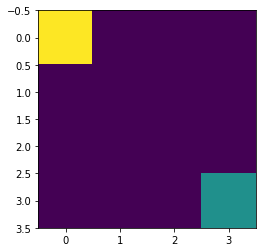

[1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]
action 0
Reward: {0: {0: [(1.0, 0, 0, True)], 1: [(1.0, 0, 0, True)], 2: [(1.0, 0, 0, True)], 3: [(1.0, 0, 0, True)]}, 1: {0: [(1.0, 5, -1, False)], 1: [(1.0, 1, -1, False)], 2: [(1.0, 2, -1, False)], 3: [(1.0, 0, -1, True)]}, 2: {0: [(1.0, 6, -1, False)], 1: [(1.0, 2, -1, False)], 2: [(1.0, 3, -1, False)], 3: [(1.0, 1, -1, False)]}, 3: {0: [(1.0, 7, -1, False)], 1: [(1.0, 3, -1, False)], 2: [(1.0, 3, -1, False)], 3: [(1.0, 2, -1, False)]}, 4: {0: [(1.0, 8, -1, False)], 1: [(1.0, 0, -1, True)], 2: [(1.0, 5, -1, False)], 3: [(1.0, 4, -1, False)]}, 5: {0: [(1.0, 9, -1, False)], 1: [(1.0, 1, -1, False)], 2: [(1.0, 6, -1, False)], 3: [(1.0, 4, -1, False)]}, 6: {0: [(1.0, 10, 6, False)], 1: [(1.0, 2, 6, False)], 2: [(1.0, 7, 6, False)], 3: [(1.0, 5, 6, False)]}, 7: {0: [(1.0, 11, -1, False)], 1: [(1.0, 3, -1, False)], 2: [(1.0, 7, -1, False)], 3: [(1.0, 6, -1, False)]}, 8: {0: [(1.0, 12, -1, False)], 1: [(1.0, 4, -1, False)],

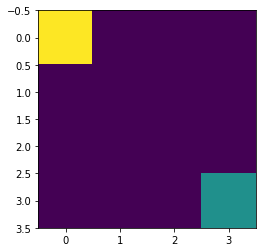

[0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]
action 3
Reward: {0: {0: [(1.0, 0, 0, True)], 1: [(1.0, 0, 0, True)], 2: [(1.0, 0, 0, True)], 3: [(1.0, 0, 0, True)]}, 1: {0: [(1.0, 5, -1, False)], 1: [(1.0, 1, -1, False)], 2: [(1.0, 2, -1, False)], 3: [(1.0, 0, -1, True)]}, 2: {0: [(1.0, 6, -1, False)], 1: [(1.0, 2, -1, False)], 2: [(1.0, 3, -1, False)], 3: [(1.0, 1, -1, False)]}, 3: {0: [(1.0, 7, -1, False)], 1: [(1.0, 3, -1, False)], 2: [(1.0, 3, -1, False)], 3: [(1.0, 2, -1, False)]}, 4: {0: [(1.0, 8, -1, False)], 1: [(1.0, 0, -1, True)], 2: [(1.0, 5, -1, False)], 3: [(1.0, 4, -1, False)]}, 5: {0: [(1.0, 9, -1, False)], 1: [(1.0, 1, -1, False)], 2: [(1.0, 6, -1, False)], 3: [(1.0, 4, -1, False)]}, 6: {0: [(1.0, 10, 6, False)], 1: [(1.0, 2, 6, False)], 2: [(1.0, 7, 6, False)], 3: [(1.0, 5, 6, False)]}, 7: {0: [(1.0, 11, -1, False)], 1: [(1.0, 3, -1, False)], 2: [(1.0, 7, -1, False)], 3: [(1.0, 6, -1, False)]}, 8: {0: [(1.0, 12, -1, False)], 1: [(1.0, 4, -1, False)],

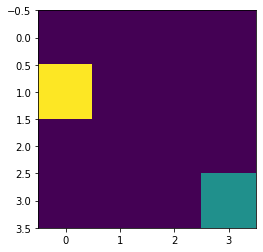

[0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]
action 0
Reward: {0: {0: [(1.0, 0, 0, True)], 1: [(1.0, 0, 0, True)], 2: [(1.0, 0, 0, True)], 3: [(1.0, 0, 0, True)]}, 1: {0: [(1.0, 5, -1, False)], 1: [(1.0, 1, -1, False)], 2: [(1.0, 2, -1, False)], 3: [(1.0, 0, -1, True)]}, 2: {0: [(1.0, 6, -1, False)], 1: [(1.0, 2, -1, False)], 2: [(1.0, 3, -1, False)], 3: [(1.0, 1, -1, False)]}, 3: {0: [(1.0, 7, -1, False)], 1: [(1.0, 3, -1, False)], 2: [(1.0, 3, -1, False)], 3: [(1.0, 2, -1, False)]}, 4: {0: [(1.0, 8, -1, False)], 1: [(1.0, 0, -1, True)], 2: [(1.0, 5, -1, False)], 3: [(1.0, 4, -1, False)]}, 5: {0: [(1.0, 9, -1, False)], 1: [(1.0, 1, -1, False)], 2: [(1.0, 6, -1, False)], 3: [(1.0, 4, -1, False)]}, 6: {0: [(1.0, 10, 6, False)], 1: [(1.0, 2, 6, False)], 2: [(1.0, 7, 6, False)], 3: [(1.0, 5, 6, False)]}, 7: {0: [(1.0, 11, -1, False)], 1: [(1.0, 3, -1, False)], 2: [(1.0, 7, -1, False)], 3: [(1.0, 6, -1, False)]}, 8: {0: [(1.0, 12, -1, False)], 1: [(1.0, 4, -1, False)],

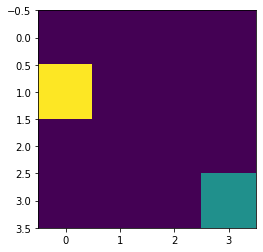

In [370]:
env = GridEnvironment()
agent = RandomAgent(env)
obs = env.reset()
done = False

while not done:
    
    plt.show()
    #print(env.observation_space)
    print(obs)  
    action = agent.step(obs)
    print("action",action)
    env.render()
    Prob, obs, reward, done, info = env.step(action)
    print('Reward:', Prob)


In [304]:
##Dynamic Programming 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Coverged_matrix [[ 0. -1. -1. -1.]
 [-1. -1.  6. -1.]
 [-1. -1. -1. -1.]
 [-4. -1. -1.  0.]]
Coverged_matrix [[ 0.    -1.735 -0.265 -1.98 ]
 [-1.735 -0.265  5.02  -0.265]
 [-2.715 -1.98  -0.265 -1.735]
 [-6.45  -2.715 -1.735  0.   ]]
Coverged_matrix [[ 0.       -1.554925 -0.7452   -2.10005 ]
 [-2.155175 -1.10535   5.7403   -0.7452  ]
 [-4.1556   -2.4602   -1.10535  -1.554925]
 [-8.49085  -4.1556   -2.155175  0.      ]]
Coverged_matrix [[  0.          -1.83434137  -0.67166937  -2.3941725 ]
 [ -2.81695063  -1.10535      5.0932305   -0.67166938]
 [ -5.22914713  -3.5778655   -1.10535     -1.83434138]
 [-10.1967605   -5.22914713  -2.81695063   0.        ]]
Coverged_matrix [[  0.          -1.88478338  -0.95270342  -2.50226252]
 [ -3.2421047   -1.76830211   5.12926051  -0.95270342]
 [ -6.34607732  -4.10390359  -1.76830211  -1.88478338]
 [-11.55869474  -6.34607732  -3.2421047    0.        ]]
Coverged_matrix [[  0.          -2.12841829  -1.05156

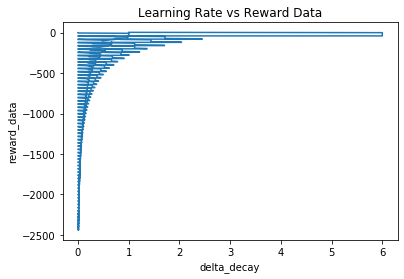

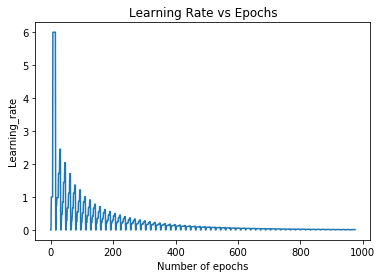

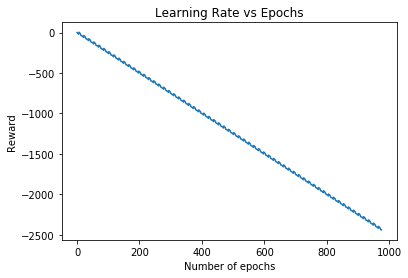

In [381]:
def policy_eval(policy, env, discount_factor=0.98, epsilon=0.01):
    """
    Evaluate a policy given an environment and a full description of the environment's dynamics.
    
    Args:
        policy: [S, A] shaped matrix representing the policy.
        theta: We stop evaluation once our value function change is less than epsilon for all states.
        discount_factor: Gamma discount factor.
    
    Returns:
        Vector of length env.nS representing the value function.
    
    """
    nS = 16
    nA = 4
    # Start with a random (all 0) value function
    V_old = np.zeros(16)
    print(V_old)
    STOCHASTIC = True
    delta_decay = []
    reward_data = []
    reward_sum = 0
    while True:
        
        #new value function
        V_new = np.zeros(16)
        #stopping condition
        delta = 0

        #loop over state space
        for s in range(nS):
#             env.render()

            #To accumelate bellman expectation eqn
            v_fn = 0
#             print(s)
#             print(policy[s])
            #get probability distribution over actions
            action_probs = policy[s]
#             print(action_probs)
            #loop over possible actions
            for a in range(nA):
#                 env.render()
                #get transitions
                [(prob, next_state, reward, done)] = env.P[s][a]
                #apply bellman expectatoin eqn
#                 print(reward)
                v_fn += action_probs[a] * (reward + discount_factor * V_old[next_state])
                reward_sum  += reward
                
            delta_decay.append(delta)
            reward_data.append(reward_sum)
            
            
            #get the biggest difference over state space
            delta = max(delta, abs(v_fn - V_old[s]))
            
            #update state-value
            V_new[s] = v_fn
            
#         delta_decay.append(delta)
#         reward_data.append(reward_sum)
        #the new value function
        V_old = V_new
        #if true value function
        if(delta < epsilon):
            break
#         print(type(V_old))
        V = np.reshape(V_old, (4,4))
        print("Coverged_matrix",V)

    print(np.array(delta_decay).shape)
    epochs = np.arange(len(reward_data))
    f1 = plt.figure()
    plt.plot(delta_decay, reward_data)
    plt.xlabel('delta_decay')
    plt.ylabel('reward_data')
    plt.title('Learning Rate vs Reward Data')
    f2 = plt.figure()
    plt.plot(delta_decay)
    plt.xlabel('Number of epochs')
    plt.ylabel('Learning_rate')
    plt.title('Learning Rate vs Epochs')
    f3 = plt.figure()
    plt.plot(reward_data)
    plt.xlabel('Number of epochs')
    plt.ylabel('Reward')
    plt.title('Learning Rate vs Epochs')
    

    plt.show()
#     plt.plot(reward_data)
    return np.array(V)


random_policy = np.ones([16, 4]) / 4
#print(random_policy)
v = policy_eval(random_policy, env)

#expected_v = np.array([0., 14., 20., 22., 14., 18., 20., 20., 20., 20., 18., 14., 22., 20., 14., 0.])
#np.testing.assert_array_almost_equal(v, expected_v, decimal=0)

#print(v)
#print(expected_v)

# obs = env.reset()

References: 
1.  Richard Sutton: Introduction to Reinforcement Learning Book. 


2.  https://towardsdatascience.com/reinforcement-learning-dynamic-programming-2b89da6ea1b


3. Gym Environments
